# Figures for Paper I

In [1]:
import os, warnings, pdb
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import fitsio
from astropy.table import Table, vstack

In [10]:
import LSLGA.io
import LSLGA.misc

In [3]:
import seaborn as sns
sns.set(style='ticks', font_scale=1.8, palette='Set2')
%matplotlib inline

In [4]:
LSLGAdir = os.getenv('LSLGA_DIR')
figdir = os.path.join(LSLGAdir, 'science', 'paper1', 'figures')

In [5]:
parent = LSLGA.io.read_parent(verbose=True)
#parent

Read galaxy indices 0 through 535787 (N=535787) from /Users/ioannis/research/projects/LSLGA/sample/v3.0/LSLGA-v3.0.fits


## Sample selection & properties

* magnitude vs D(25)
* spatial distribution of the sample

In [26]:
from LSLGA.desiutil import plot_sky_binned, prepare_data, plot_healpix_map
ra, dec = parent['RA'].data, parent['DEC'].data

data = prepare_data((ra, dec), clip_lo=0.05, clip_hi=0.95)
ax = init_sky(galactic_plane_color='k')
plot_healpix_map(data)

ValueError: Invalid data array, should be 1D.

Using healpix map with NSIDE=32 and pixel area 3.357 sq.deg.


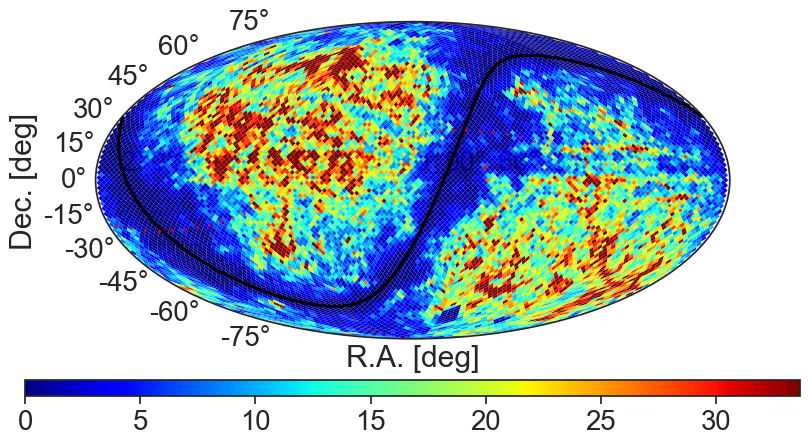

In [34]:
def qa_binned_radec(cat, nside=32, png=None):
    import warnings
    import healpy as hp
    from LSLGA.desiutil import plot_sky_binned
    
    binsz = hp.nside2pixarea(nside, degrees=True)

    ra, dec = cat['RA'].data, cat['DEC'].data
    #pixweight = LSLDA.misc.io.load_pixweight(nside)
    #fracarea = pixweight[hpix]
    #weights = 1 / fracarea
    weights = np.ones_like(ra)
    
    ax = init_sky(galactic_plane_color='k')
    ax = plot_sky_binned(ra, dec, max_bin_area=binsz, verbose=True, ax=ax,
                         plot_type='healpix', 
                         cmap='jet',
                         clip_lo='5%', clip_hi='95%')
    
    if png:
        plt.savefig(png, bbox_inches='tight', pad_inches=0)
        
qa_binned_radec(parent, png=os.path.join(figdir, 'radec.png'))

(63, 196)


ValueError: Invalid data array, should be 1D.

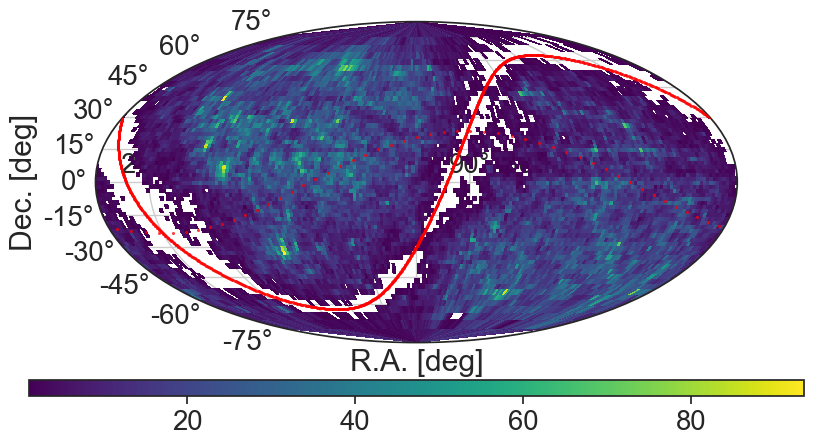

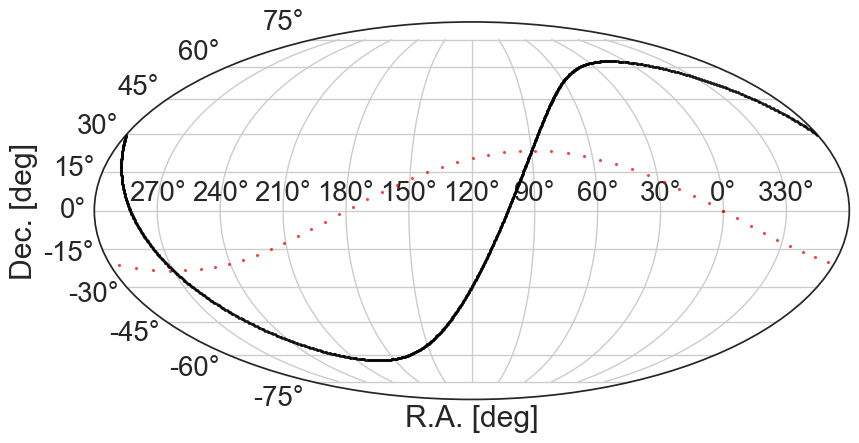

In [32]:
def qa_binned_radec(cat, nside=32, png=None):
    import warnings
    import healpy as hp
    from LSLGA.desiutil import plot_sky_binned, prepare_data 
    
    binsz = hp.nside2pixarea(nside, degrees=True)

    ra, dec = cat['RA'].data, cat['DEC'].data

    #pixweight = LSLDA.misc.io.load_pixweight(nside)
    #fracarea = pixweight[hpix]
    #weights = 1 / fracarea
    weights = np.ones_like(ra)
    
    hpix = LSLGA.misc.radec2pix(nside, ra, dec)
    _, data = plot_sky_binned(ra, dec, max_bin_area=binsz,
                              clip_lo='!1', weights=weights,
                              return_grid_data=True)
    print(data.shape)
    if np.any(~data.mask):
        lo, hi = 5, 95
        plo, phi = np.percentile(data[~data.mask], [lo, hi])
        data.data[data.data > phi] = phi
        data.data[data.data < plo] = plo
        
    ax = init_sky(galactic_plane_color='k')
    plot_healpix_map(data, nest=False, cmap='jet', ax=ax)
    
    if png:
        plt.savefig(png, bbox_inches='tight', pad_inches=0)
        
qa_binned_radec(parent, png=os.path.join(figdir, 'radec.png'))

In [31]:
ww = (parent['DIAM_REF'] != 'iso') * (parent['D25'] > 0.985) * (parent['D25'] < 0.995)
bb = parent[ww]
bb

LSLGA_ID,GALAXY,PGC,OBJTYPE,RA,DEC,TYPE,BAR,RING,MULTIPLE,COMPACTNESS,T,PA,BT,IT,KT,MODBEST,DIAM_ISO,DIAM_OPT,DIAM_IR,BA_ISO,BA_OPT,BA_IR,D25,BA,DIAM_REF,Z,SB_D25,MAG,MAG_REF,GROUPID,DESIGNATION,WISE_RA,WISE_DEC,CNTR,W1MPRO,W1SIGMPRO,W2MPRO,W2SIGMPRO,W3MPRO,W3SIGMPRO,W4MPRO,W4SIGMPRO,RCHI2,NB,NA,CC_FLAGS,EXT_FLG,PH_QUAL,MOON_LEV,W1MAG,W1SIGM,W2MAG,W2SIGM,W3MAG,W3SIGM,W4MAG,W4SIGM,XSCPROX,W1GMAG,W1GERR,W2GERR,W3GMAG,W3GERR,W4GMAG,W4GERR,TMASS_KEY,J_M_2MASS,J_MSIG_2MASS,H_M_2MASS,H_MSIG_2MASS,K_M_2MASS,K_MSIG_2MASS,INWISE,IN_DESI,NEAR_BRIGHTSTAR
int64,bytes29,int64,bytes1,float64,float64,bytes4,bytes3,bytes3,bytes3,bytes3,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes3,float32,float32,float32,bytes1,int64,bytes20,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float32,int32,int32,bytes4,int32,bytes4,bytes4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64,float64,float64,bool,bool,bool
111,SDSSJ000003.96+102918.1,6467342,G,0.0165375,10.4883851,nan,nan,nan,nan,nan,nan,114.96,20.795,18.99,nan,42.195,nan,0.9889293,nan,nan,0.31813508,nan,0.9889293,0.31813508,opt,0.50623685,29.399307,20.795,B,0,J000003.99+102917.4,0.016646,10.4881752,110601351031037,15.285,0.04,15.199,0.093,12.487,nan,8.365,nan,0.9315,1,0,0000,0,AAUU,1111,15.1,0.058,15.038,0.141,12.118,nan,8.187,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,True,True,False
229,SDSSJ000007.69+234443.4,6532289,G,0.032082,23.7454103,nan,nan,nan,nan,nan,nan,52.12,20.171,19.355,nan,42.306,nan,0.9890297,nan,nan,0.2543695,nan,0.9890297,0.2543695,opt,0.528519,28.775528,20.171,B,0,J000007.70+234443.4,0.0321176,23.7453998,124201351005231,15.296,0.042,15.337,0.097,11.97,nan,8.628,nan,0.9128,1,0,0000,0,AAUU,1122,15.198,0.055,15.519,0.234,11.72,nan,8.431,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,True,True,False
254,SDSSJ000008.56+053257.1,6126659,G,0.0356835,5.5492153,nan,nan,nan,nan,nan,nan,72.09,21.563,19.44,nan,42.524,nan,0.9891227,nan,nan,0.30915418,nan,0.9891227,0.30915418,opt,0.57501113,30.167732,21.563,B,0,J000008.57+053257.0,0.0357492,5.549176,106001351005061,15.343,0.04,15.443,0.115,12.542,nan,8.77,nan,0.9216,1,0,0000,0,ABUU,0000,15.007,0.04,15.324,0.177,12.135,nan,8.01,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,True,True,False
261,SDSSJ000008.68+154003.8,5357913,G,0.036166500000000004,15.6677361,nan,nan,nan,nan,nan,nan,45.21,19.323,19.243,nan,41.934,nan,0.9891307,nan,nan,0.14204018,nan,0.9891307,0.14204018,opt,0.45705286,27.92775,19.323,B,0,J000008.73+154004.1,0.0363789,15.6678246,115101351056549,14.897,0.036,14.701,0.066,11.909,0.29,8.6,nan,1.135,1,0,0000,0,AABU,1111,14.669,0.03,14.607,0.089,12.144,0.501,8.035,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,True,True,False
271,SDSSJ000008.98+021816.5,6096487,G,0.037431,2.3046008,nan,nan,nan,nan,nan,nan,125.64,21.385,19.819,nan,43.281,nan,0.9890547,nan,nan,2.0221329,nan,0.9890547,2.0221329,opt,0.76750094,29.989582,21.385,B,0,J000008.98+021816.5,0.037428,2.3046045,103001351005204,15.148,0.038,15.086,0.089,12.368,nan,8.87,0.499,0.9561,1,0,0000,0,AAUC,0000,14.902,0.048,14.898,0.119,11.554,nan,8.427,0.519,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,True,True,False
428,SDSSJ000014.54-083506.4,6639050,G,0.06058350000000001,-8.585137199999998,nan,nan,nan,nan,nan,nan,109.91,20.69,19.253,nan,42.865,nan,0.9882723,nan,nan,0.63979924,nan,0.9882723,0.63979924,opt,0.65566355,29.292864,20.69,B,0,J000014.53-083506.4,0.060547,-8.5851184,9101351058795,15.063,0.038,14.977,0.097,12.201,nan,8.258,nan,1.086,1,0,0000,0,AAUU,3400,14.706,0.028,14.571,0.127,11.933,nan,7.793,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,True,True,False
459,SDSSJ000015.84+231212.5,6532277,G,0.06603599999999998,23.2034883,nan,nan,nan,nan,nan,nan,163.08,19.723,18.7

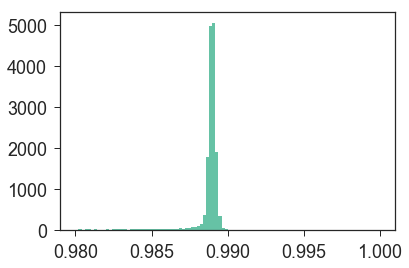

In [30]:
#plt.scatter(bb['RA'], bb['DEC'], s=1)
_ = plt.hist(bb['D25'], bins=100, range=(0.98, 1))
#plt.xlim(0.98, 1)

In [ ]:
def qa_sample(png=None):

    d25lim = (-1, 2)
    #d25lim = (np.log10(10/60), 3)
    mulim = (18.5, 31)
    Blim = (5, 25.2)

    leda_igal = leda['objtype'] == 'G'
    igal = parent['objtype'] == 'G'

    m31 = np.where(leda['galaxy'][leda_igal] == 'NGC0224')[0]
    smc = np.where(leda['galaxy'][leda_igal] == 'NGC0292')[0]
        
    mag, d25, mu = parent['mag'][igal], np.log10(parent['d25'][igal]), parent['sb_d25'][igal]
    leda_mag, leda_d25, leda_mu = leda['mag'][leda_igal], np.log10(leda['d25'][leda_igal]), leda['sb_d25'][leda_igal]
        
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    #ax1.hexbin(leda_mag, leda_d25, extent=(np.hstack( (Blim, d25lim) )), 
    #           mincnt=1, cmap='gray', alpha=0.5) # 'Blues_r')
    #ax1.scatter(mag, d25, s=5, color='firebrick', alpha=0.5)
    ax1.hexbin(mag, d25, extent=(np.hstack( (Blim, d25lim) )), bins='log', 
               mincnt=1, cmap='viridis', alpha=0.5) # 'Blues_r')
    
    ax1.axhline(y=np.log10(10/60), ls='--', lw=2, color='k')#, xmin=7, xmax=24
    
    ax1.set_xlim(Blim)
    ax1.set_ylim(d25lim)
    ax1.set_xlabel(r'$B_{AB}$ (mag)')
    ax1.set_ylabel(r'$\log_{10}\, D_{25}$ (arcmin)')

    if False:
        ax1.annotate('M31', xy=(leda_mag[m31], leda_d25[m31]), xytext=[leda_mag[m31]+6, leda_d25[m31]+0.4], 
                     arrowprops=dict(facecolor='k', shrink=0.1, width=1, 
                                     headwidth=6), fontsize=16, horizontalalignment='center',
                                     verticalalignment='top')

        ax1.annotate('SMC', xy=(leda_mag[smc], leda_d25[smc]), xytext=[leda_mag[smc]+0.7, leda_d25[smc]-0.8], 
                     arrowprops=dict(facecolor='k', shrink=0.1, width=1, 
                                     headwidth=6), fontsize=16, horizontalalignment='left',
                                     verticalalignment='top')
    
    #ax2.hexbin(leda_d25, leda_mu, extent=(np.hstack( (d25lim, mulim) )), 
    #           mincnt=1, cmap='gray', alpha=0.5)
    #ax2.scatter(d25, mu, s=5, color='firebrick', alpha=0.5)
    ax2.hexbin(mu, d25, extent=(np.hstack( (mulim, d25lim) )), bins='log',
               mincnt=1, cmap='viridis', alpha=0.5)
    #im = ax2.hexbin(d25, mu, extent=(np.hstack( (d25lim, mulim) )), bins='log',
    #                mincnt=1, cmap='viridis', alpha=0.5)
    #cb = fig.colorbar(im, ticks=[np.log10([3, 10, 30, 100, 300, 1000])])
    #cb.ax.set_yticklabels(['3', '10', '30', '100', '300', '1000'])
    #cb.set_label('log$_{10}$ (Number of Galaxies per Bin)')
    
    #ax2.axvline(x=np.log10(10/60), ls='--', lw=2, color='k')#, xmin=7, xmax=24
    ax2.axhline(y=np.log10(10/60), ls='--', lw=2, color='k')#, xmin=7, xmax=24
                
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position('right')
    ax2.set_ylim(d25lim)
    ax2.set_xlim(mulim)
    ax2.set_xlabel(r'$\mu_{B}$ (mag arcsec$^{-2}$)')
    #ax2.set_xlabel(r'$\log_{10}\, D_{25}$ (arcmin)')
    ax2.set_ylabel(r'$\log_{10}\, D_{25}$ (arcmin)', rotation=270, labelpad=25)
    
    if False:
        ax2.annotate('M31', xy=(leda_d25[m31], leda_mu[m31]), xytext=[leda_d25[m31]-0.8, leda_mu[m31]-4], 
                     arrowprops=dict(facecolor='k', shrink=0.1, width=1, 
                                     headwidth=6), fontsize=16, horizontalalignment='center',
                                     verticalalignment='top')
        ax2.annotate('SMC', xy=(leda_d25[smc], leda_mu[smc]), xytext=[leda_d25[smc], leda_mu[smc]+2], 
                     arrowprops=dict(facecolor='k', shrink=0.1, width=1, 
                                     headwidth=6), fontsize=16, horizontalalignment='right',
                                     verticalalignment='top')
    
    fig.subplots_adjust(wspace=0.05, bottom=0.2)
    
    if png:
        fig.savefig(png)
        
qa_sample(png=os.path.join(adapdir, 'qa_sample.png'))

### Galaxy montage

Demonstrate the range of galaxies and environments the atlas will span.  This will likely be the first figure, so do we want to include the GALEX + WISE data?

In [ ]:
def get_sample():
    w1 = np.where(parent['galaxy'] == 'NGC3938')[0]
    w2 = np.where(parent['galaxy'] == 'NGC5322')[0]
    w3 = np.where(parent['galaxy'] == 'IC4182')[0]
    w4 = np.where(parent['galaxy'] == 'NGC3719')[0]
    #w4 = np.where(parent['galaxy'] == 'PGC044711')[0]
    these = np.hstack( (w1, w2, w3, w4) )
    sample = parent[these]
    sample['layer'] = ['mzls+bass-dr6', 'mzls+bass-dr6', 'mzls+bass-dr6', 'decals-dr5']
    sample['factor'] = [2.5, 2.5, 2.5, 4]
    sample['ra'][3] = 173.0722 # move the center over a bit
    sample['dec'][3] = 0.8194
    sample['nicegalaxy'] = ['NGC3938', 'NGC5322', 'IC4182', 'NGC3719 / NGC3720 Group']
    #sample['galaxy'][3] = 'CGCG071-093_Group'
    return sample

def make_montage(jpg_clobber=False, png_clobber=False, montage_clobber=False):
    from PIL import Image, ImageDraw, ImageFont

    sample = get_sample()
    
    barlen = np.round(60.0 / PIXSCALE).astype('int') # [1 arcmin in pixels]
    fonttype = os.path.join(LSLGAdir, 'cutouts', 'Georgia.ttf')    
    
    cutouturl = 'http://legacysurvey.org/viewer-dev/jpeg-cutout'

    # Get the viewer cutouts in each layer
    for thislayer, band in zip( ('ls', 'galex', 'unwise-neo3'), ('grz', 'FUV-NUV', 'W1-W2') ):
        layer = thislayer
        for ii, gal in enumerate(sample):
            
            jpgfile = os.path.join(adapdir, 'montage', '{}-{}.jpg'.format(gal['galaxy'], band))
            if os.path.isfile(jpgfile) and not jpg_clobber:
                print('File {} exists...skipping.'.format(jpgfile))
            else:
                if os.path.isfile(jpgfile):
                    os.remove(jpgfile)
            
                if thislayer == 'ls':
                    layer = gal['layer']
                
                size = np.ceil(gal['d25'] * gal['factor'] * 60 / PIXSCALE).astype(np.int)
                imageurl = '{}/?ra={:.8f}&dec={:.8f}&pixscale={:.3f}&size={:g}&layer={}'.format(
                    cutouturl, gal['ra'], gal['dec'], PIXSCALE, size, layer)
                cmd = 'wget --continue -O {:s} "{:s}"' .format(jpgfile, imageurl)
                print(cmd)
                os.system(cmd)

            # Optionally add labels
            pngfile = jpgfile.replace('.jpg', '.png')
            if os.path.isfile(jpgfile):
                if os.path.isfile(pngfile) and not png_clobber:
                    print('File {} exists...skipping.'.format(pngfile))
                else:
                    # Add the galaxy name to the top row
                    if thislayer == 'galex':
                        im = Image.open(jpgfile)
                        sz = im.size
                        fntsize = np.round(sz[0]/18).astype('int')
                        width = np.round(sz[0]/175).astype('int')
                        font = ImageFont.truetype(fonttype, size=fntsize)
                        draw = ImageDraw.Draw(im)
                        draw.text((0+fntsize*1.5, 0+fntsize*1.5), gal['nicegalaxy'].replace('_', ' '), font=font)
                        if ii == 0:
                            draw.text((0+fntsize*1.5, sz[1]-fntsize*2), band.replace('-', '/'), font=font)
                        im.save(pngfile)
                    elif thislayer == 'unwise-neo3': # Add the scale bar to the bottom row
                        im = Image.open(jpgfile)
                        sz = im.size
                        fntsize = np.round(sz[0]/18).astype('int')
                        width = np.round(sz[0]/175).astype('int')
                        font = ImageFont.truetype(fonttype, size=fntsize)
                        draw = ImageDraw.Draw(im)
                        x0, x1, yy = sz[1]-fntsize*2-barlen, sz[1]-fntsize*2, sz[0]-fntsize*2
                        draw.line((x0, yy, x1, yy), fill='white', width=width)
                        if ii == 0:
                            draw.text((0+fntsize*1.5, sz[1]-fntsize*2), band.replace('-', '/'), font=font)
                        im.save(pngfile)
                    else: # grz
                        im = Image.open(jpgfile)
                        if ii == 0:
                            sz = im.size
                            fntsize = np.round(sz[0]/18).astype('int')
                            font = ImageFont.truetype(fonttype, size=fntsize)
                            draw = ImageDraw.Draw(im)
                            draw.text((0+fntsize*1.5, sz[1]-fntsize*2), band.replace('-', '/'), font=font)
                        im.save(pngfile)
                        
    # Make the final montage.
    montagefile = os.path.join(adapdir, 'galaxy-montage.png')
    ncol, nrow = 4, 3
    if os.path.isfile(montagefile) and not montage_clobber:
        print('File {} exists...skipping.'.format(montagefile))
    else:
        imlist = ' '
        for band in ('FUV-NUV', 'grz', 'W1-W2'):
            for gg in np.atleast_1d(sample['galaxy']):
                imlist = imlist+' '+os.path.join(adapdir, 'montage', '{}-{}.png'.format(gg, band))

        cmd = 'montage -bordercolor white -borderwidth 1 -tile {}x{} -geometry 512x512 '.format(
            ncol, nrow)
        cmd = cmd+imlist
        #cmd = cmd+' '.join([os.path.join(adapdir, 'montage', '{}.png'.format(gg)) for gg in montage['galaxy']])
        cmd = cmd+' {}'.format(montagefile)
        print(cmd)
        os.system(cmd)        
        print('Wrote {}'.format(montagefile))
        # Reduce the file size.
        cmd = 'convert -quality 99 -resize 1024 {} {}'.format(montagefile, montagefile.replace('.png', '.jpg'))
        os.system(cmd)        
        print('Wrote {}'.format(montagefile.replace('.png', '.jpg')))

sample = make_montage(jpg_clobber=False, png_clobber=False, montage_clobber=True)